In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as web

from sklearn import (
    linear_model, metrics, neural_network, pipeline, preprocessing, model_selection
)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis"
data_url += "/master/compas-scores-two-years.csv"

### Exercise 1:

#### Loading up recidivism data and fitting logistic regression model

In [7]:
df = pd.read_csv(data_url)
df.head()
X = df[["decile_score"]]
y = df["two_year_recid"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
logistic_model = linear_model.LogisticRegression(solver="lbfgs")
logistic_model.fit(X_train, y_train)

beta_0 = logistic_model.intercept_[0]
beta_1 = logistic_model.coef_[0][0]

print(f"Fit model: p(recid) = L({beta_0:.4f} + {beta_1:.4f} decile_score)")

Fit model: p(recid) = L(-1.4318 + 0.2720 decile_score)


Cutoff value for classification threshold of 0.5:

In [11]:
classification_threshold = 0.5
decile_score_cutoff = (classification_threshold + 1.4318)/0.2720
decile_score_cutoff

7.102205882352941

Cutoff value for classification threshold of 0.7:

In [13]:
classification_threshold = 0.7
decile_score_cutoff = (classification_threshold + 1.4318)/0.2720
decile_score_cutoff

7.8375

Cutoff value for classification threshold of 0.3:

In [14]:
classification_threshold = 0.3
decile_score_cutoff = (classification_threshold + 1.4318)/0.2720
decile_score_cutoff

6.366911764705882

Thus, an increase in the classification threshold increases the decile score cutoff and vice versa

### Exercise 2:

#### Adding second feature to model:

Decile score and Age:

In [15]:
X = df[["decile_score", "age"]]
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)

logistic_age_model = linear_model.LogisticRegression(solver="lbfgs")
logistic_age_model.fit(X_train, y_train)

beta_0 = logistic_age_model.intercept_[0]
beta_1, beta_2 = logistic_age_model.coef_[0]

print(f"Fit model: p(recid) = L({beta_0:.4f} + {beta_1:.4f} decile_score + {beta_2:.4f} age)")

Fit model: p(recid) = L(-0.8505 + 0.2470 decile_score + -0.0130 age)


/Users/basingse/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


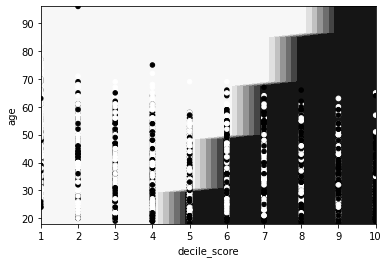

In [16]:
def plot_contours(ax, mod, xx, yy, **params):
    """
    Plot the decision boundaries for a classifier with 2 features x and y.

    Parameters
    ----------
    ax: matplotlib axes object
    mod: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = mod.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def fit_and_plot_decision_boundary(mod, X, y, **params):
    # fit model
    mod.fit(X, y)

    # generate grids of first two columns of X
    def gen_grid(xseries):
        if xseries.nunique() < 50:
            return sorted(xseries.unique())
        else:
            return np.linspace(xseries.min(), xseries.max(), 50)

    x1, x2 = np.meshgrid(gen_grid(X.iloc[:, 0]), gen_grid(X.iloc[:, 1]))

    # plot contours and scatter
    fig, ax = plt.subplots()
    plot_contours(ax, mod, x1, x2, **params)
    x1_name, x2_name = list(X)[:2]
    X.plot.scatter(x=x1_name, y=x2_name, color=y, ax=ax)
    ax.set_xlabel(x1_name)
    ax.set_ylabel(x2_name)

    return ax

fit_and_plot_decision_boundary(
    linear_model.LogisticRegression(solver="lbfgs"),
    X_train, y_train, cmap=plt.cm.Greys
)


Juvenile felony count and priors count:

In [32]:
X = df[["juv_fel_count", "priors_count"]]
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)

logistic_age_model = linear_model.LogisticRegression(solver="lbfgs")
logistic_age_model.fit(X_train, y_train)

beta_0 = logistic_age_model.intercept_[0]
beta_1, beta_2 = logistic_age_model.coef_[0]

print(f"Fit model: p(recid) = L({beta_0:.4f} + {beta_1:.4f} juv_fel_count + {beta_2:.4f} priors_count)")

Fit model: p(recid) = L(-0.6187 + 0.3900 juv_fel_count + 0.1279 priors_count)


/Users/basingse/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


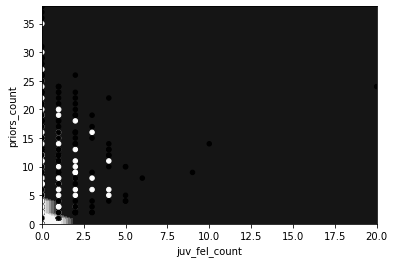

In [33]:
fit_and_plot_decision_boundary(
    linear_model.LogisticRegression(solver="lbfgs"),
    X_train, y_train, cmap=plt.cm.Greys
)

Juvenile missed count and priors count:

In [34]:
X = df[["juv_misd_count", "priors_count"]]
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)

logistic_age_model = linear_model.LogisticRegression(solver="lbfgs")
logistic_age_model.fit(X_train, y_train)

beta_0 = logistic_age_model.intercept_[0]
beta_1, beta_2 = logistic_age_model.coef_[0]

print(f"Fit model: p(recid) = L({beta_0:.4f} + {beta_1:.4f} juv_misd_count + {beta_2:.4f} priors_count)")

Fit model: p(recid) = L(-0.6227 + 0.4207 juv_misd_count + 0.1259 priors_count)


/Users/basingse/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


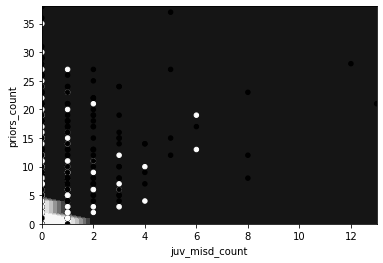

In [35]:
fit_and_plot_decision_boundary(
    linear_model.LogisticRegression(solver="lbfgs"),
    X_train, y_train, cmap=plt.cm.Greys
)

Juvenile Felony count and Age

In [37]:
X = df[["juv_fel_count", "age"]]
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)

logistic_age_model = linear_model.LogisticRegression(solver="lbfgs")
logistic_age_model.fit(X_train, y_train)

beta_0 = logistic_age_model.intercept_[0]
beta_1, beta_2 = logistic_age_model.coef_[0]

print(f"Fit model: p(recid) = L({beta_0:.4f} + {beta_1:.4f} juv_fel_count + {beta_2:.4f} age)")

Fit model: p(recid) = L(0.9097 + 0.6176 juv_fel_count + -0.0324 age)


/Users/basingse/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


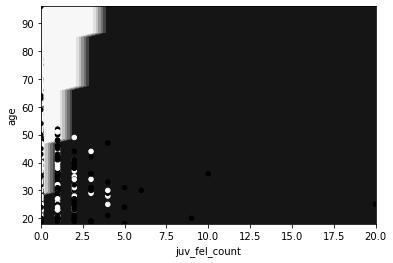

In [38]:
fit_and_plot_decision_boundary(
    linear_model.LogisticRegression(solver="lbfgs"),
    X_train, y_train, cmap=plt.cm.Greys
)

### Exercise 3:

In [40]:
X = df[["decile_score", "age"]]
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)

logistic_age_model = linear_model.LogisticRegression(solver="lbfgs")
logistic_age_model.fit(X_train, y_train)

LogisticRegression()

In [41]:
train_acc = logistic_age_model.score(X_train, y_train)
test_acc = logistic_age_model.score(X_test, y_test)

train_acc, test_acc

(0.6534195933456562, 0.667960088691796)

In [42]:
report = metrics.classification_report(
    y_train, logistic_age_model.predict(X_train),
    target_names=["no recid", "recid"]
)
print(report)

              precision    recall  f1-score   support

    no recid       0.67      0.73      0.69      2940
       recid       0.64      0.57      0.60      2470

    accuracy                           0.65      5410
   macro avg       0.65      0.65      0.65      5410
weighted avg       0.65      0.65      0.65      5410



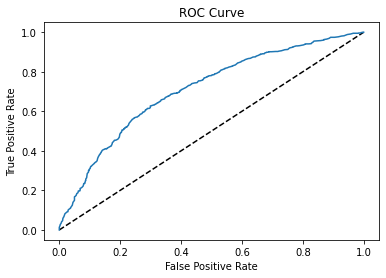

In [43]:
def plot_roc(mod, X, y):
    # predicted_probs is an N x 2 array, where N is number of observations
    # and 2 is number of classes
    predicted_probs = mod.predict_proba(X_test)

    # keep the second column, for label=1
    predicted_prob1 = predicted_probs[:, 1]

    fpr, tpr, _ = metrics.roc_curve(y_test, predicted_prob1)

    # Plot ROC curve
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], "k--")
    ax.plot(fpr, tpr)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve")

plot_roc(logistic_age_model, X_test, y_test)


Determine an appropriate value for the probability threshold, keeping in mind preference for high precision over high recall: